## Satellite Image Classification using Neural Networks: Part2-Model Building

### Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler 
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from time import time
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
def trian_data_read(data_path):
    df=pd.read_csv(data_path, index_col=[0])
    return df

def test_data_read(data_path):
    df=pd.read_csv(data_path, header=None)
    return df

       

### Reading train data

In [3]:
train_data=trian_data_read(data_path="train_feature.csv")
train_label=test_data_read(data_path="deepsat-sat4/y_train_sat4.csv")
print("Training data shape: ",train_data.shape)
print("Training label shape: ",train_label.shape)

Training data shape:  (400000, 18)
Training label shape:  (400000, 4)


In [4]:
train_data.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17
0,0.000972,641.150882,0.306289,461.331689,0.090310,215.859026,1204.175873,6.631558,10.440948,0.000136,5.311662,-0.222073,0.961082,0.302352,0.099163,5.290839e-08,0.171526,0.103628
1,0.000776,385.099375,0.494946,397.449769,0.062843,291.636648,1204.699702,6.941100,10.633986,0.000195,4.891717,-0.294508,0.986615,0.094648,0.232414,7.760388e-08,0.063343,0.096983
2,0.000501,683.379290,0.628080,919.231590,0.062133,165.899621,2993.547070,7.497042,11.166380,0.000129,5.631485,-0.323338,0.992616,0.363837,0.182992,4.199208e-08,0.202709,0.122439
3,0.003203,543.981199,0.718768,968.697183,0.182567,213.813450,3330.807532,6.813396,9.529273,0.000323,4.607932,-0.376704,0.993467,0.183581,0.073847,5.167177e-08,0.102311,0.069599
4,0.000896,239.167945,0.427079,209.522910,0.086702,202.101768,598.923696,6.577780,10.507105,0.000214,4.936963,-0.196489,0.946186,0.133382,0.133871,5.034725e-08,0.186360,0.133182


In [5]:
train_label.head()

,0,1,2,3
0,0,0,0,1
1,1,0,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,1,0


### Reading test data

In [6]:
test_data=trian_data_read(data_path="test_feature.csv")
test_label=test_data_read(data_path="deepsat-sat4/y_test_sat4.csv")
print("Test data shape: ",test_data.shape)
print("Test label shape: ",test_label.shape)

Test data shape:  (100000, 18)
Test label shape:  (100000, 4)


In [7]:
test_data.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17
0,0.000767,335.291138,0.376090,272.877332,0.068837,274.961012,756.218190,6.726062,10.672314,0.000157,5.130096,-0.215871,0.960871,0.075847,0.168096,7.052749e-08,0.146079,0.120556
1,0.001052,587.080323,0.309110,455.328749,0.044852,285.265382,1234.234673,6.767680,10.329559,0.000182,4.946849,-0.278713,0.979682,0.082069,0.311748,7.902225e-08,0.259992,0.224726
2,0.001129,1333.707078,0.829911,3924.339461,0.096924,326.812450,14363.650765,7.977212,10.616184,0.000107,5.749332,-0.441541,0.998714,0.357081,0.102150,7.869438e-08,0.098074,0.070147
3,0.001709,215.269519,0.154822,131.325949,0.129670,232.300939,310.034276,5.993647,9.659665,0.000311,4.617008,-0.178564,0.911160,0.183145,0.181026,5.768320e-08,0.275191,0.193047
4,0.002261,244.519064,0.045149,131.285288,0.115564,172.574604,280.622089,5.897293,9.615730,0.000314,4.844679,-0.155865,0.889380,0.189491,0.238340,4.386601e-08,0.414560,0.296843


In [8]:
test_label.head()

,0,1,2,3
0,1,0,0,0
1,1,0,0,0
2,0,0,0,1
3,0,0,1,0
4,0,0,1,0


### Data standardization

In [9]:
sc=StandardScaler()
#fit the training data
fit=sc.fit(train_data)

In [10]:
##transform the train and test data
train_data_stn=fit.transform(train_data)
test_data_stn=fit.transform(test_data)

### Model Building

In [59]:
model=Sequential()

#layer1
model.add(Dense(units=50,input_shape=(train_data_stn.shape[1],),use_bias=True))
#model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))

#layer2
model.add(Dense(units=50, use_bias=True))
#model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))

#layer3
model.add(Dense(units=4, activation="softmax"))


##ADD early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))
#tensorboard=TensorBoard(log_dir='logs/{}'.format(time()))

#compile the model
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])



### Model Training

In [60]:
model.fit(train_data_stn, train_label.values, validation_split=0.2, batch_size=128, epochs=500,callbacks=[es, mc,tensorboard]) 


Train on 320000 samples, validate on 80000 samples


Epoch 1/500
320000/320000 [==============================] - 4s 12us/step - loss: 0.1651 - accuracy: 0.9472 - val_loss: 0.0665 - val_accuracy: 0.9792

Epoch 00001: val_accuracy improved from -inf to 0.97916, saving model to best_model.h5

Epoch 2/500
320000/320000 [==============================] - 3s 11us/step - loss: 0.0797 - accuracy: 0.9751 - val_loss: 0.0500 - val_accuracy: 0.9840

Epoch 00002: val_accuracy improved from 0.97916 to 0.98403, saving model to best_model.h5
Epoch 3/500
320000/320000 [==============================] - 3s 10us/step - loss: 0.0646 - accuracy: 0.9797 - val_loss: 0.0417 - val_accuracy: 0.9864

Epoch 00003: val_accuracy improved from 0.98403 to 0.98640, saving model to best_model.h5
Epoch 4/500
320000/320000 [==============================] - 3s 10us/step - loss: 0.0560 - accuracy: 0.9820 - val_loss: 0.0370 - val_accuracy: 0.9884

Epoch 00004: val_accuracy improved from 0.98640 to 0.98843, saving model t

### Load Trained Model

In [12]:
best_train_model= tf.keras.models.load_model('best_model.h5')


## Model Evaluation

In [13]:
Accuracy_on_test_data=best_train_model.evaluate(test_data_stn, test_label.values)

100000/100000 [==============================] - 3s 28us/sample - loss: 0.0188 - acc: 0.9938


## Confusion Matrix Creation

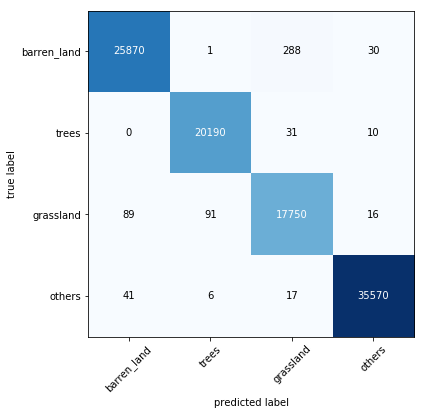

In [70]:
#label converter
# [1,0,0,0]=barren_land
# [0,1,0,0]=trees
# [0,0,1,0]=grassland
# [0,0,0,1]=others


##Building confusion matrix

y_pred=best_train_model.predict_classes(test_data_stn)
y_true=np.argmax(test_label.values, axis=1)
cm=confusion_matrix(y_target=y_true, y_predicted=y_pred)

plot_confusion_matrix(cm,class_names=["barren_land","trees","grassland","others"],figsize=(6,6) )
plt.show()

### Precision and Recall calculation

In [22]:
def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()
    
def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()

def precision_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_precisions = 0
    for label in range(rows):
        sum_of_precisions += precision(label, confusion_matrix)
    return sum_of_precisions / rows

def recall_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_recalls = 0
    for label in range(columns):
        sum_of_recalls += recall(label, confusion_matrix)


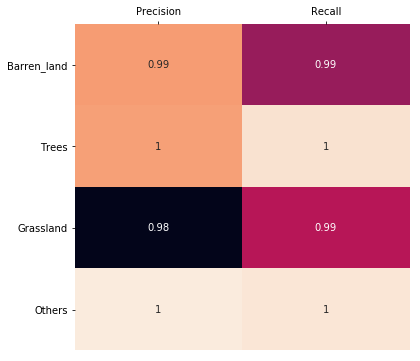

In [61]:
label_= {0:"barren_land",1:"trees",2:"grassland",3:"others"}
dic={}
precision_=[]
recall_=[]
precision_macro_average_=[]
for label in range(4):
    precision_.append(precision(label, cm))
    recall_.append(recall(label, cm))
    
dic["Precision"]= precision_
dic["Recall"]= recall_

plt.figure(figsize=(6,6))
ax=sns.heatmap(pd.DataFrame(dic, index=["Barren_land","Trees","Grassland","Others"]),annot=True,cbar=False)
plt.yticks(rotation=0)
ax.xaxis.tick_top() # x axis on top

plt.show()